In [1]:
from agent_load_testing.use_case_generator import generate_use_case, generate_garage_use_case
from rlway_cpagent.osrd_adapter import regulation_problem_from_schedule, schedule_from_solution
from rlway_cpagent.ortools_agent.ortools_solver import OrtoolsRegulationSolver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from agent_load_testing.load_testing import load_testing

/home/cpombet/dev/cpagent/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Use case generation

In [2]:
ref_schedule, delayed_schedule = generate_garage_use_case(3, 5, 0.3)

## Use case description

In [3]:
ref_schedule.draw_graph()

<Axes: xlabel='Time'>

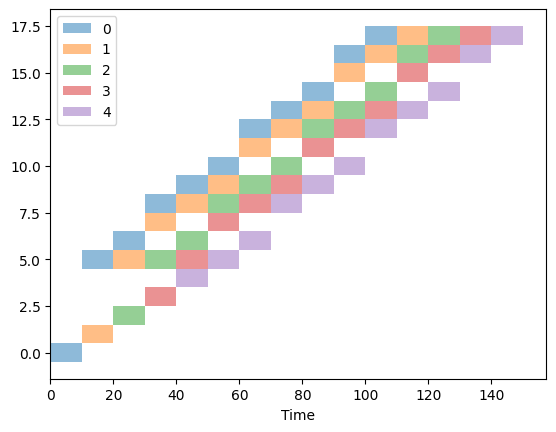

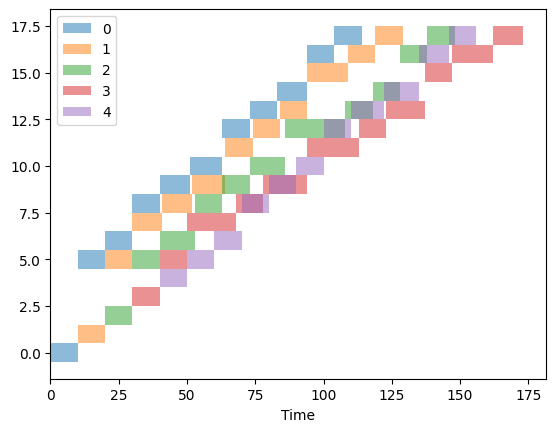

In [4]:
ref_schedule.plot()
delayed_schedule.plot()

## Solve

In [5]:
cp_problem = regulation_problem_from_schedule(ref_schedule, delayed_schedule)
solver = OrtoolsRegulationSolver()
solution = solver.solve(cp_problem)
regulated_schedule = schedule_from_solution(solution)

## Viz Solution

<Axes: xlabel='Time'>

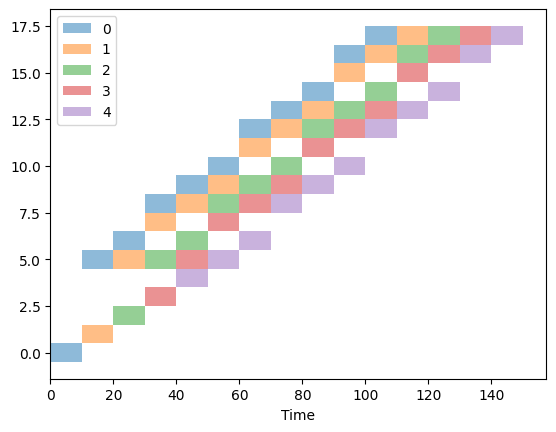

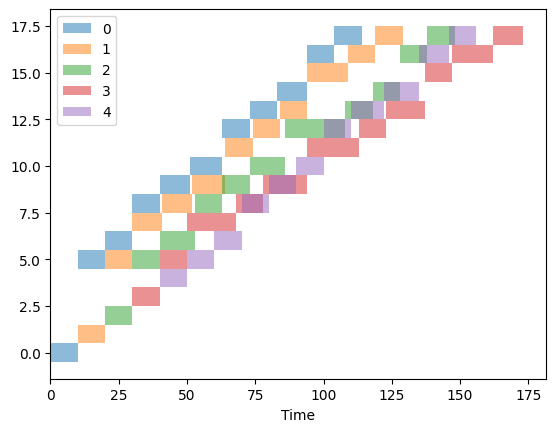

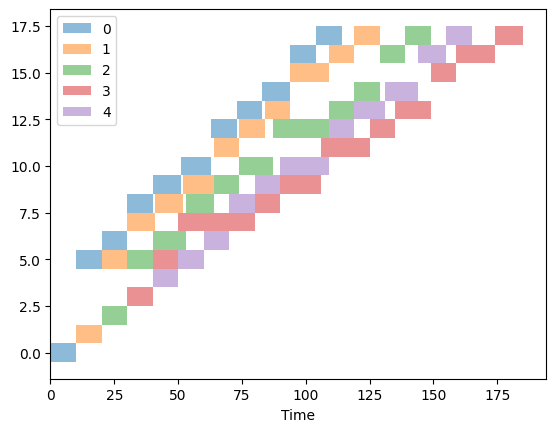

In [6]:
ref_schedule.plot()
delayed_schedule.plot()
regulated_schedule.plot()

# Performance Testing

In [7]:
performances = load_testing(OrtoolsRegulationSolver(), generate_garage_use_case, 10, 10)

29it [04:46, 26.55s/it]

In [17]:
df = pd.DataFrame.from_records(performances, columns=["NbStations", "NbTrains", "ComputingTime"])
df = df.pivot(index='NbStations', columns='NbTrains', values='ComputingTime')
#print(df)
df = df.sort_index(ascending=False)
print(df)

NbTrains          1         2         3         4         5         6   \
NbStations                                                               
20          0.013959  0.030027  0.034946  0.048655  0.055665  0.102964   
19          0.009801  0.026347  0.033134  0.047686  0.060189  0.067778   
18          0.008121  0.024824  0.032016  0.087724  0.053645  0.062469   
17          0.007858  0.064305  0.029898  0.039440  0.053276  0.054759   
16          0.007940  0.018463  0.028172  0.038716  0.046922  0.055629   
15          0.007233  0.018805  0.023401  0.037655  0.041743  0.050951   
14          0.006822  0.014790  0.028738  0.030856  0.035798  0.093568   
13          0.005716  0.014742  0.025136  0.027376  0.033805  0.046288   
12          0.008568  0.014119  0.018818  0.027415  0.033565  0.039843   
11          0.005676  0.012202  0.015967  0.023697  0.027857  0.031481   
10          0.006836  0.009789  0.015361  0.023600  0.028411  0.032143   
9           0.004433  0.009722  0.0138

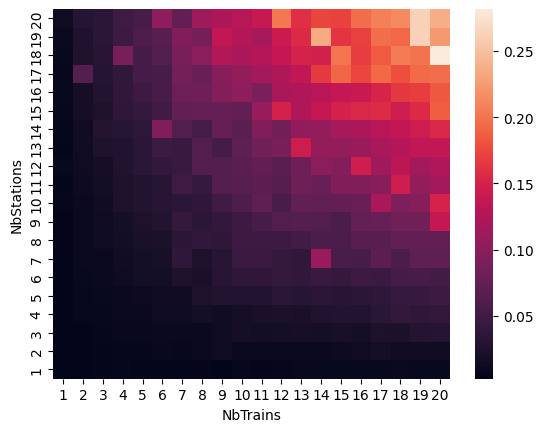

In [18]:
ax = sns.heatmap(df)
plt.show()